In [12]:
import h5py
import numpy as np 
# -- desi -- 
import desispec.io as desiIO
# -- FOMOspec -- 
from FOMOspec import util as UT

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
def readFirefly(galid, dust='hpf_only'): 
    fname = ''.join([UT.dat_dir(), 'Lgal/spectra/',
                     'firefly.m11.MILES.imf_cha.dust_', dust, '.', 
                     'desi_out_gal_spectrum_', str(galid), '_BGS_template_BC03_Stelib.hdf5'])
    f = h5py.File(fname, 'r')
    
    output = {} 
    for g in f.keys(): 
        if g != 'properties': 
            output[g] = f[g].value
            
    props = {} 
    for k in f['properties'].keys(): 
        props[k] = f['properties'][k].value
    return output, props

In [14]:
def SpecDESI(galid): 
    f_name = 'gal_spectrum_'+str(galid)+'_BGS_template_BC03_Stelib.fits'
    f_outspec = ''.join([UT.dat_dir(), 'Lgal/spectra/', 'desi_out_', f_name])
    spec = desiIO.read_spectra(f_outspec) #fits.open(f_outspec)[1].data
    waves, fluxes = [], []
    for band in ['b', 'r', 'z']: 
        waves.append(spec.wave[band])
        fluxes.append(spec.flux[band][0])
    return np.concatenate(waves), np.concatenate(fluxes)

Text(0.5,0,'Rest-frame Wavelength [$\\AA$]')

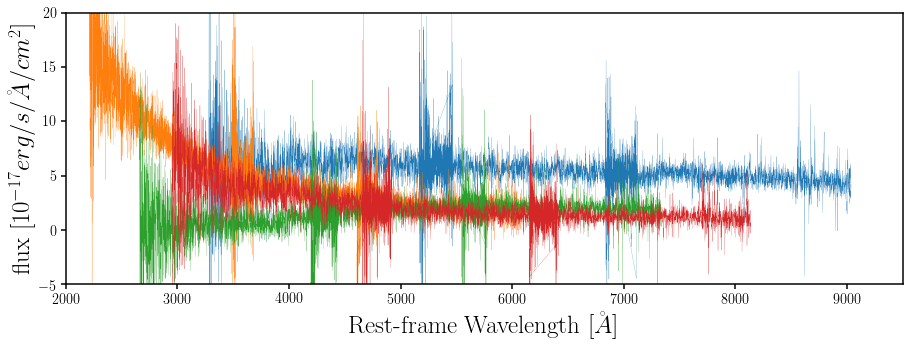

In [27]:
fig = plt.figure(figsize=(15,5)) 
sub = fig.add_subplot(111)
for ii, idd in enumerate([1, 101314, 253044, 10924]): 
    out, prop = readFirefly(idd, dust='hpf_only')
    
    w, f = SpecDESI(idd)
    sub.plot(w/(1.+prop['redshift']), f, lw=0.2)
    
    #sub.plot(out['wavelength'], out['flux_data'], lw=0.5, label='LGal DESI spectra')
    sub.set_xlim([2e3, 9.5e3])
    sub.set_ylabel('flux [$10^{-17} erg/s/\AA/cm^2$]', fontsize=25)
    sub.set_ylim([-5., 20.])
    if ii == 0: sub.legend(loc='upper right', fontsize=20)
sub.set_xlabel('Rest-frame Wavelength [$\AA$]', fontsize=25)

Text(0.5,0,'Rest-frame Wavelength [$\\AA$]')

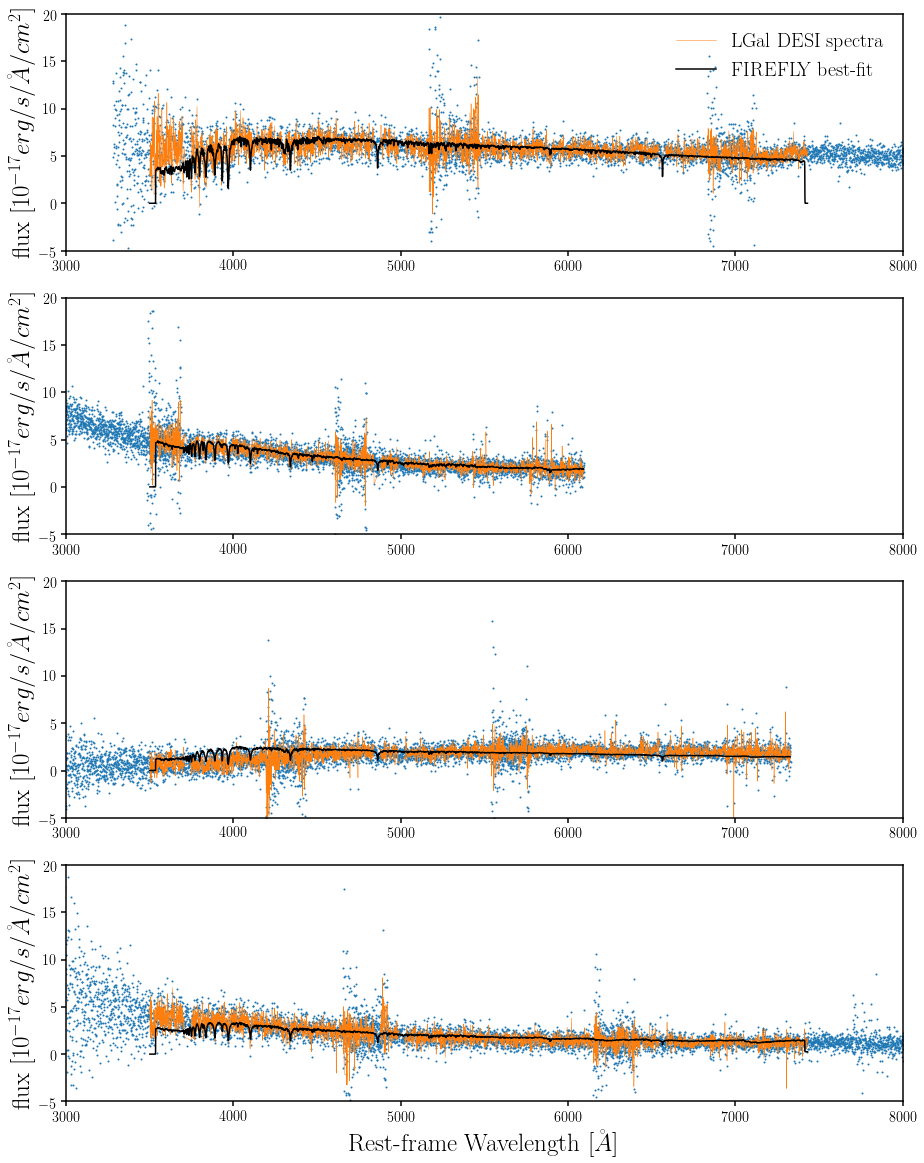

In [21]:
fig = plt.figure(figsize=(15,20)) 
for ii, idd in enumerate([1, 101314, 253044, 10924]): 
    sub = fig.add_subplot(4,1,ii+1)

    out, prop = readFirefly(idd, dust='hpf_only')
    w, f = SpecDESI(idd)
    sub.scatter(w/(1.+prop['redshift']), f, c='C0', s=1)
    
    sub.plot(out['wavelength'], out['flux_data'], c='C1', lw=0.5, label='LGal DESI spectra')
    sub.plot(out['wavelength'], out['flux_bestfit'], c='k', label='FIREFLY best-fit')
    sub.set_xlim([3e3, 8e3])
    sub.set_ylabel('flux [$10^{-17} erg/s/\AA/cm^2$]', fontsize=25)
    sub.set_ylim([-5., 20.])
    if ii == 0: sub.legend(loc='upper right', fontsize=20)
sub.set_xlabel('Rest-frame Wavelength [$\AA$]', fontsize=25)

(0.08821394, 9.668858475805623)
(0.6134225999999999, 9.107768242330065)
(0.3416854, 10.13224408061761)
(0.208736, 9.085994983811128)


Text(0.5,0,'Rest-frame Wavelength [$\\AA$]')

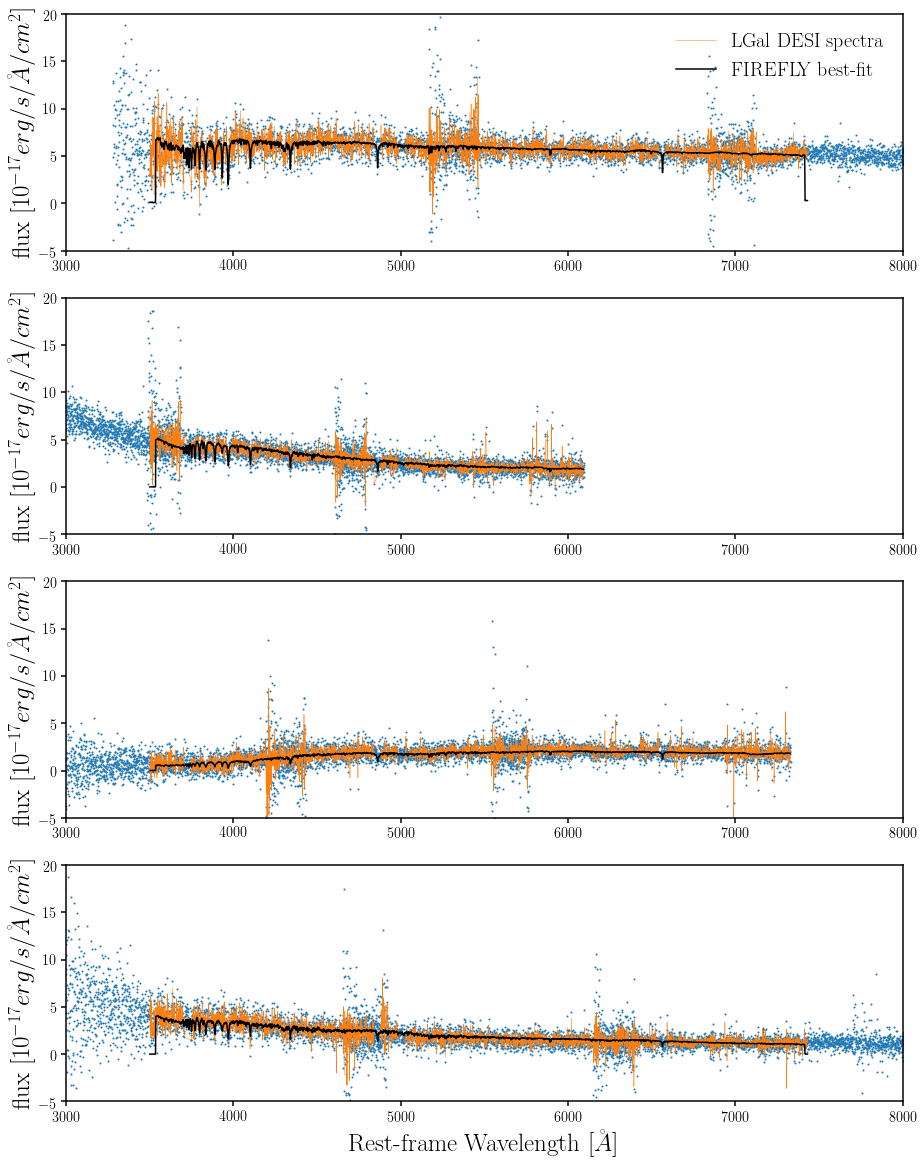

In [23]:
fig = plt.figure(figsize=(15,20)) 
for ii, idd in enumerate([1, 101314, 253044, 10924]): 
    sub = fig.add_subplot(4,1,ii+1)
    out, prop = readFirefly(idd, dust='on')
    print(prop['redshift'], prop['stellar_mass'])
    w, f = SpecDESI(idd)
    sub.scatter(w/(1.+prop['redshift']), f, c='C0', s=1)
    
    sub.plot(out['wavelength'], out['flux_data'], c='C1', lw=0.5, label='LGal DESI spectra')
    sub.plot(out['wavelength'], out['flux_bestfit'], c='k', label='FIREFLY best-fit')
    sub.set_xlim([3e3, 8e3])
    sub.set_ylabel('flux [$10^{-17} erg/s/\AA/cm^2$]', fontsize=25)
    sub.set_ylim([-5., 20.])
    if ii == 0: sub.legend(loc='upper right', fontsize=20)
sub.set_xlabel('Rest-frame Wavelength [$\AA$]', fontsize=25)